In [40]:
import pandas as pd 
import numpy as np
import pandas as pd

df=pd.read_csv("DataSample.csv", skipinitialspace=True)
poi=pd.read_csv("POIList.csv", skipinitialspace=True)


#Question 1
#remove identical points

poi=poi.drop_duplicates(subset=['Latitude', 'Longitude'])
df=df.drop_duplicates(subset=['TimeSt','Latitude', 'Longitude'])
print(df)

           _ID                   TimeSt Country Province              City  \
0      4516516  2017-06-21 00:00:00.143      CA       ON          Waterloo   
1      4516547  2017-06-21 18:00:00.193      CA       ON            London   
2      4516550  2017-06-21 15:00:00.287      CA       ON            Guelph   
3      4516600  2017-06-21 15:00:00.307      CA       ON         Stratford   
4      4516613  2017-06-21 15:00:00.497      CA       ON         Stratford   
...        ...                      ...     ...      ...               ...   
22019  5614760  2017-06-21 08:23:01.793      CA       AB           Calgary   
22020  5614801  2017-06-21 12:23:07.880      CA       ON  Saint Catharines   
22022  5614909  2017-06-21 00:23:07.903      CA       ON            Whitby   
22023  5614912  2017-06-21 11:23:07.953      CA       ON          Oakville   
22024  5615006  2017-06-21 17:23:08.033      CA       ON          Oakville   

       Latitude  Longitude  
0      43.49347  -80.49123  
1    

In [41]:
print(poi)

  POIID   Latitude   Longitude
0  POI1  53.546167 -113.485734
2  POI3  45.521629  -73.566024
3  POI4  45.224830  -63.232729


In [42]:
df.head()

,_ID,TimeSt,Country,Province,City,Latitude,Longitude
0,4516516,2017-06-21 00:00:00.143,CA,ON,Waterloo,43.49347,-80.49123
1,4516547,2017-06-21 18:00:00.193,CA,ON,London,42.93990,-81.27090
2,4516550,2017-06-21 15:00:00.287,CA,ON,Guelph,43.57760,-80.22010
3,4516600,2017-06-21 15:00:00.307,CA,ON,Stratford,43.37160,-80.97730
4,4516613,2017-06-21 15:00:00.497,CA,ON,Stratford,43.37160,-80.97730


In [43]:
#question 2


def element_1(x):
    return x[1]


minlist = []
dic={}


for i, row_df in enumerate(df.itertuples(), 1):
    for j, row_poi in enumerate(poi.itertuples(), 1):
        
        values=abs(row_df.Latitude-row_poi.Latitude)+abs(row_df.Longitude-row_poi.Longitude)
        dic[row_poi.POIID]=values
        #iterate through datasample and points and find the closest point with minimal distance
        #add min point to minlist[]
    minlist.append(min(dic.items(), key=element_1)[0])

#assign minlist to POIID values    
df['POIID'] = minlist

#add min POIID for each point to the dataSample
df = df.merge(poi, on='POIID', how='inner')


#Use haversine function to get the distance between two points (in decimal degrees)
def haversine_np(lon1, lat1, lon2, lat2):

    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2

    c = 2 * np.arcsin(np.sqrt(a))
    km = 6367 * c
    return km

df['Distance'] = haversine_np(df['Longitude_x'],df['Latitude_x'],df['Longitude_y'],df['Latitude_y'])
print(df)





           _ID                   TimeSt Country Province        City  \
0      4516516  2017-06-21 00:00:00.143      CA       ON    Waterloo   
1      4516547  2017-06-21 18:00:00.193      CA       ON      London   
2      4516550  2017-06-21 15:00:00.287      CA       ON      Guelph   
3      4516600  2017-06-21 15:00:00.307      CA       ON   Stratford   
4      4516613  2017-06-21 15:00:00.497      CA       ON   Stratford   
...        ...                      ...     ...      ...         ...   
19994  5609963  2017-06-21 01:22:29.770      CA       NS     Halifax   
19995  5610158  2017-06-21 00:22:37.700      CA       ON     Toronto   
19996  5612336  2017-06-21 14:22:50.413      CA       NS  Antigonish   
19997  5612443  2017-06-21 13:22:53.050      CA       ON     Toronto   
19998  5612839  2017-06-21 01:22:52.897      CA       ON     Toronto   

       Latitude_x  Longitude_x POIID  Latitude_y  Longitude_y     Distance  
0        43.49347    -80.49123  POI3   45.521629   -73.566

In [16]:
df.head()



,_ID,TimeSt,Country,Province,City,Latitude_x,Longitude_x,POIID,Latitude_y,Longitude_y,Distance
0,4516516,2017-06-21 00:00:00.143,CA,ON,Waterloo,43.49347,-80.49123,POI3,45.521629,-73.566024,593.040870
1,4516547,2017-06-21 18:00:00.193,CA,ON,London,42.93990,-81.27090,POI3,45.521629,-73.566024,676.884410
2,4516550,2017-06-21 15:00:00.287,CA,ON,Guelph,43.57760,-80.22010,POI3,45.521629,-73.566024,569.290087
3,4516600,2017-06-21 15:00:00.307,CA,ON,Stratford,43.37160,-80.97730,POI3,45.521629,-73.566024,634.335482
4,4516613,2017-06-21 15:00:00.497,CA,ON,Stratford,43.37160,-80.97730,POI3,45.521629,-73.566024,634.335482


In [17]:
#3a

table = pd.DataFrame()
table['Average_dist'] = df.groupby(['POIID'])['Distance'].mean()
table['Standard_distance'] = df.groupby(['POIID'])['Distance'].std()


print(grouped)


      Distance_Avg  Distance_Std
POI1    291.138528    279.827448
POI3    453.536308    228.402310
POI4    693.036189   2182.121107


In [18]:
#3b


table['Radius'] = df.groupby(['POIID'])['Distance'].max()
table['Density']= df.groupby(['POIID'])['Distance'].size()/(grouped['Radius'] ** 2) * np.pi

print(grouped)

      Distance_Avg  Distance_Std        Radius   Density
POI1    291.138528    279.827448   1683.699818  0.010748
POI3    453.536308    228.402310   1539.047958  0.013019
POI4    693.036189   2182.121107  14183.402143  0.000008


[73, 20, 97, 102, 36]

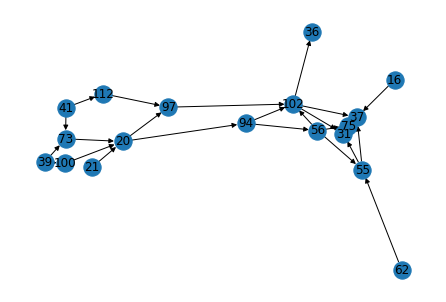

In [45]:
import networkx as nx

Graph = nx.DiGraph()

#I used a library that applies dijkstra algorithm and finds the shortest part from source to sink

f = open("relations.txt", "r")

edge_list=[]
for x in f:
    edge=(int(x.split("->")[0]),int(x.split("->")[1].rstrip('\n')))

    edge_list.append(edge)


node=[]
f = open("task_ids.txt", "r")
for word in f.read().split(","):
    node.append(int(word))
    
    
Graph.add_nodes_from(node)
Graph.add_edges_from(edge_list)


nx.draw_spectral(Graph,with_labels=True)

nx.shortest_path(Graph, source=73, target=36, weight=None, method='dijkstra')